In [ ]:
# Keep this code cell here
# Project title will be used by the reviewer
PROJECT_TITLE = "Mushrooms and Neural Nets"
NOTEBOOK_ID   = "1-XgVe42DgWelGgEFWjdbOFg59ZEyLifN"
VERSION = "FA20.10.10.2020"


---
# Project Introduction

<img align="left" src="http://drive.google.com/uc?export=view&id=10GhY0AgAZLiXrJIoTj85Coaqss6ot3RN" width="300"/>

• One of the biggest critiques of Machine Learning is that it is a black box. This doesn't just refer to the model's being largely unintelligible to human readers, but also to the fact that many of the algorithms and methods tend to be portrayed as only accessible to people with a PhD in mathematics.

• There are many frameworks which improve the accessibility of Machine Learning: frameworks like `PyTorch`, `tensorflow`, `keras`, and `sklearn` are both hugely popular and powerful. While these frameworks are important, especially in a commercial setting, it adds further mystique to the already confusing field.

• My goal will be to build a Neural Net from scratch. Often when this is done, people just have a series of NumPy equations in a 20 line hardcoded program which is not only difficult to understand, but also far from generic. I intend to create a Neural Net from scratch which is built as a series of higher level components which both show the underlying logic while also being more configurable and generic.

• As a demonstration, I will use those components to build and train a Neural Net on the [mushroom dataset from UCI](https://archive.ics.uci.edu/ml/datasets/Mushroom) to demystify how Neural Nets work and how to use them for classification.

<!-- • Even formulas when needed: 
$$e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!}$$ -->

<!-- 

   VIDEO INSTRUCTIONS

1. upload to google drive, get the share URL
https://drive.google.com/file/d/1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

2. convert to export URL:
http://drive.google.com/uc?export=download&id=1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

3. OR use some other service to host your video:
https://storage.googleapis.com/uicourse/videos/dmap/Exact%20Instructions%20Challenge%20-%20THIS%20is%20why%20my%20kids%20hate%20me.%20%20Josh%20Darnit.mp4

replace the src="YOUR VIDEO URL" in the <source> tag in the next cell below
-->

In [ ]:
%%html
<!-- this should be the ONLY html cell in the notebook: use markdown -->
<div style="font-size:36px; max-width:800px; font-family:Times, serif;">
 Title Your Video (and update the video URL)
<video width="600" controls>
  <source src="https://drive.google.com/uc?export=download&id=1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX"
  type="video/mp4">
</video>
</div>

In [ ]:
# add your imports here for your entire project
import pandas as pd
import numpy as np

# Data Acquisition, Selection, Cleaning

## What is the dataset?

The dataset contains **8,124 samples** of mushroom data, with **22 distinct attributes** collected. The goal of the dataset is to determine if a mushroom is poisonous or edible based on these attributes. A random guess offers roughly 50% accuracy, so the goal is to allow the Neural Net to train on a subset of the data, and then test its accuracy on another subset that it has not yet seen hopefully with much higher accuracy than guessing. Its ability to accurately classify data it was not trained on indicates if the model can generalize or was overfit to the training data.

### Attributes and option counts

Below is a list of attributes for each sample as well as the number of distinct values each attribute can take on.

1. cap-shape: 6
2. cap-surface: 4
3. cap-color: 10
4. bruises?: 2
5. odor: 9
6. gill-attachment: 4
7. gill-spacing: 3
8. gill-size: 2
9. gill-color: 12
10. stalk-shape: 2
11. stalk-root: 7 (including "?")
12. stalk-surface-above-ring: 4
13. stalk-surface-below-ring: 4
14. stalk-color-above-ring: 9
15. stalk-color-below-ring: 9
16. veil-type: 2
17. veil-color: 4
18. ring-number: 3
19. ring-type: 8
20. spore-print-color: 9
21. population: 6
22. habitat: 7

### Cleaning and preparing the data

The first thing to note is that UCI provides their data separate from the names of each attribute. They provide two files: `agaricus-lepiota.names` and `agaricus-lepiota.data`. The data file is a CSV file but without the header row. So first we will create a CSV file with the header row. I have uploaded a modified file [here](https://drive.google.com/file/d/1f6m9plNUFV_KnqHIX68Jw_RZslnra4rW/view?usp=sharing)

Another thing worth noting is that attribute 11 has 2,480 missing values which are denoted by `?`

Finally, the CSV has the class (poisonous or edible) stored on the first column so we should extract that into a set of labels and a set of features.


## Step 1: Load the data into a dataframe

Our first step is to use `pandas` to load the CSV into a dataframe. This allows us to easily manipulate the data and prepare it for our Neural Net down the road.

In [ ]:
import pandas as pd

MUSHROOM_URL = "https://drive.google.com/uc?export=view&id=1f6m9plNUFV_KnqHIX68Jw_RZslnra4rW"

def install_data():
    """
    Get the mushroom dataset and create a Pandas dataframe
    """
    return pd.read_csv(MUSHROOM_URL)

def show_mushroom_df():
    """
    Show samples of the mushroom dataset
    """
    mushroom_df = install_data()

    return mushroom_df.head(5)

show_mushroom_df()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## Step 2: Separate the labels and features

Now that we have the dataframe, we need to separate it into two separate dataframes: one for features and one for labels. We don't want our Neural Net learning to just spit back the class label!

In [ ]:
def separate_df(df):
    """
    Separates the given dataframe into labels and features dataframes
    """
    labels = df["class"]
    features = df.drop(columns="class")

    return features, labels

def show_features():
    """
    Show samples of the features
    """
    mushroom_df = install_data()
    features, _ = separate_df(mushroom_df)

    return features.head(5)

# Verify features does not contain class labels
show_features()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## Step 3: Encode the features

Next we have to encode the labels into numbers to easily pass into the Neural Net. To do this we will use an `Encoder` from `sklearn` as we saw in an earlier lesson. This allows us to convert the data in the dataframes into `numpy` arrays of numbers. The reason we do this now instead of before separating the data was to take advantage of the easy data manipulation of `pandas` in separating the features from labels.

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_column(column):
    """
    Encode a single column using the LabelEncoder from sklearn
    """
    encoder = LabelEncoder()
    return encoder.fit_transform(column)

def encode_features(features):
    """
    Encode each column of the features dataframe and return the numpy matrix
    """
    encoded_features = features.copy()

    for column in features.columns:
        encoded_features[column] = encode_column(features[column])

    return encoded_features.values

def encode_labels(labels):
    """
    Encode the labels dataframe (only one column)
    """
    return encode_column(labels)

def show_encoded_features():
    """
    Show what the encoded features looks like in comparison to the pandas dataframe earlier
    """
    mushroom_df = install_data()
    features, _ = separate_df(mushroom_df)

    print("Encoded features (first 5):")
    print(encode_features(features)[0:5])

show_encoded_features()

Encoded features (first 5):
[[5 2 4 1 6 1 0 1 4 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [5 2 9 1 0 1 0 0 4 0 2 2 2 7 7 0 2 1 4 3 2 1]
 [0 2 8 1 3 1 0 0 5 0 2 2 2 7 7 0 2 1 4 3 2 3]
 [5 3 8 1 6 1 0 1 5 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [5 2 3 0 5 1 1 0 4 1 3 2 2 7 7 0 2 1 0 3 0 1]]


## Step 4: Separate into subsets

Finally our data is in the right format for our Neural Net. Now we just need to separate our data into 3 sets: training, validation, and test. The reason why we separate the data now rather than training on all the data is to test our network's ability to generalize what it learned and classify data it was not trained on. The purposes of each set are as follows:

- Training: this is the set of features and labels that is fed into the Neural Net

- Validation: this is a set of data which we use to progressively verify the accuracy of the Neural Net as it learns. This gives us an indicator of if it is working without training the entire network (which can be time consuming)

- Test: this data is completely separate and only used at the end when the model is fully trained to verify the results

In [ ]:
from sklearn.model_selection import train_test_split

VALIDATION_SIZE = 0.1 # 10% is reserved for validation
TEST_SIZE = 0.1 / (1.0 - VALIDATION_SIZE) # 10% reserved for testing (adjusted because of remaining size)

def seeded_dataset_split(features, labels, size):
    """
    Separate the data with consistent seeded shuffling. This is important for consistency of results
    """
    return train_test_split(features, labels, test_size=size, shuffle=True, random_state=0)

def separate_datasets(features, labels):
    """
    Separate the given data into 3 sets: training, validation, and testing
    """
    remaining_features, val_features, remaining_labels, val_labels = seeded_dataset_split(features, labels, size=VALIDATION_SIZE)
    train_features, test_features, train_labels, test_labels = seeded_dataset_split(remaining_features, remaining_labels, size=TEST_SIZE)

    return (train_features, train_labels), (val_features, val_labels), (test_features, test_labels)

def show_dataset_counts():
    """
    Show the distribution of data between the different datasets
    """
    mushroom_df = install_data()
    features, labels = separate_df(mushroom_df)

    encoded_features = encode_features(features)
    encoded_labels = encode_labels(labels)

    train_data, val_data, test_data = separate_datasets(encoded_features, encoded_labels)

    print("Training samples:", len(train_data[0]))
    print("Validation samples:", len(val_data[0]))
    print("Testing samples:", len(test_data[0]))

show_dataset_counts()

Training samples: 6498
Validation samples: 813
Testing samples: 813


# Data Exploration

## Distribution

A useful statistics for when we later measure the success of the Neural Net is to find out the baseline. Based on the data, the classes are distributed nearly equally:

- 51.8% edible
- 48.2% poisonous

This means we will be looking to roughly beat 50% accuracy (random guessing) as an indication of learning (though we should be able to achieve far higher)

In [ ]:
import numpy as np
np.random.seed(0)

def get_accuracy(y, y_hat):
    """
    Get the accuracy given the labels and the predictions
    """
    return (y == y_hat).mean()

def generate_random_labels(count):
    """
    Generate a given amount of random labels
    """
    return np.random.choice([0, 1], count)

def show_random_accuracy():
    """
    Show the accuracy of randomly guessing the labels as a baseline
    """
    mushroom_df = install_data()
    _, labels = separate_df(mushroom_df)

    encoded_labels = encode_labels(labels)
    random_labels = generate_random_labels(len(encoded_labels))

    print("Actual labels:")
    print(encoded_labels)
    print("Random labels:")
    print(random_labels)

    print("Random guess accuracy:", get_accuracy(encoded_labels, random_labels))

show_random_accuracy()

Actual labels:
[1 0 0 ... 0 1 0]
Random labels:
[0 1 1 ... 0 1 1]
Random guess accuracy: 0.4981536189069424


# Neural Nets

### What is a Neural Net?

A neural network, in its simplest incarnation, is a series of connected layers which consist of nodes intended to mimic the behavior of neurons. The neural network is one of the more black-box models in Machine Learning because of their sheer size and complexity. A single neural net can consist of millions of parameters with tens or hundreds of hyperparameters that can be tuned to improve results, and the math consists largely of linear algebra and calculus. The beauty of neural nets is that they are designed such that you can easily customize them and they determine which patterns in the data are worth learning rather than you needing to decide what is relevant to the classification process yourself.

<img align="center" src="http://drive.google.com/uc?export=view&id=1HDCjczqDrLM03Pyp2ONFrrj9nZEsZsI8" width="400"/>

### How do Neural Nets make predictions?

Neural nets are fairly simple to use once they have been constructed. The process of making a prediction is known as the `forward pass`. Given some input data with dimensions matching the network's input layer size, we can push the data through the layers consecutively until we reach the final layer which provides an output prediction.

### How do Neural Nets learn from data?

Once you have gotten a prediction for some given input data, you need the network to *learn* from that data. This process is known as the `backward pass` which involves `backpropagation`. Given the predicted output and the correct output, we can calculate the network's error. We then push the data back through the layers, updating the layers as we go with the goal of moving the layer's weights towards values that would be more likely to produce the desired output for the given input data.

We will discuss the math and implementation of this piece by piece as we go.

## Neural Net Components

We are going to implement a series of basic building blocks of a neural net. The goal is to build these components to be plug and play and allow for a configurable and extendable neural net. This is one of the amazing parts of libraries like `PyTorch` where it is simple to build basic Neural Nets and highly configurable if you want to build your own components and integrate them.

We will implement each component along with a discussion of what that component is, how it works, and why we use it.

### Neural Nets - Activation Functions

Activation functions are an important part of neural nets. They serve as a transformation between layers which accepts the output of a layer and manipulates it to serve as an input to the next layer.

One of the key reasons to use activation functions as opposed to directly feeding layer outputs to the next layer is to prevent data from being amplified in undesirable directions (for instance numbers becoming huge in a certain direction). Different functions have different strengths and weaknesses and can be chosen experimentally depending on the problem.

Another advantage of activation functions is it increases the ability of the neural net to learn complex data by using a non-linear activation function.

**Using the activation function**

<img align="center" src="http://drive.google.com/uc?export=view&id=1lNyuZyNxoCPBnYfy1QHKOHwo8__Qh_ec" width="400"/>

At a high level, the math behind an activation function is very simple. We pass the output of the linear layer (which we will discuss later) into the activation function and this provides the activated output which is the input to the next layer. This kind of passing order applies to both the forward pass and the backward pass, the main difference being the direction and the fact that the backward pass uses gradients thus it is important to pick functions which are differentiable.



In [ ]:
class ActivationFunction:
    """
    Activation Function base class
    https://en.wikipedia.org/wiki/Activation_function
    """

    @classmethod
    def forward(cls, linear_out):
        """
        Evaluate the activation function on the output of the linear layer
        """
        raise Exception("Unimplemented")
    
    @classmethod
    def backward(cls, grad_out, activated_out):
        """
        Evaluate the gradient of the activation function based on the outputs from the forward pass
        """
        raise Exception("Unimplemented")

#### ReLU

ReLU is an extremely popular activation function for many reasons. The first obvious advantage of ReLU is how mathematically simple it is to understand and compute. The function is:

> $
y =
\left
    \{
        \begin{array}{ll}
            x & x > 0 \\
            0 & x <= 0 \\
        \end{array} 
\right.
$

This satisfies the non-linearity requirement and has a very simple gradient:

> $
\nabla y =
\left
    \{
        \begin{array}{ll}
            1 & x > 0 \\
            0 & x <= 0 \\
        \end{array} 
\right.
$

This makes our calculations simpler and our network faster, but there is also a surprising benefit of ReLU that has helped it attain such success in the field and that is that ReLU layers combined can readily approximate other non-linear functions and can do so via simpler computations. It also does not suffer from a vanishing gradient which means that the gradient doesn't approach 0 as data gets increasingly high.

It is important to not underestimate the cost of complex activation functions. Training networks can be extremely time intensive and since the process of tuning networks is often experimental, long training can mean it is harder to adapt your network or even use it.

In [ ]:
class ReLU(ActivationFunction):
    """
    Implements the ReLU activation function (the de facto choice for linear neural nets)
    https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
    """

    @classmethod
    def forward(cls, linear_out):
        """
        Output the linear layer's value if it is positive, and 0 if it is not
        """
        return np.maximum(linear_out, 0)
    
    @classmethod
    def backward(cls, grad_out, activated_out):
        """
        Clears the gradient wherever the activated_out was 0
        """
        new_grad = grad_out.copy()
        new_grad[activated_out == 0] = 0
        return new_grad

#### Softmax

Softmax is a more complex activation function than ReLU, but offers some distinct advantages. It can be very useful as the final activation function because it produces probabilistic outputs which are easy to understand. However, it suffers from numerical issues like underflow and overflow (where the numbers either become too small or too large to remain precise due to the limitations of the data type). The other advantage of Softmax is that its derivative combines nicely with the Cross Entropy loss function (discussed later) which is a popular choice, making the combination very common.

In comparison to ReLU, the computations are far more complex (and thus can slow your model):

> $ \sigma (X) = \frac{e^{X_i}}{\sum_{j=1}^K e^{X_j}} \text{ for } i=1,...,K \text{ and } X = (X_1,...,X_K) \in \mathbb{R}^K $

The more common version to use is a "stable" softmax which subtracts the max value like so:

> $ \sigma_\text{stable} (X) = \sigma (X - \text{max}(X)) $

This prevents overflow, though underflow can still be an issue.

In [ ]:
class Softmax(ActivationFunction):
    """
    Implements the Softmax activation function
    https://en.wikipedia.org/wiki/Softmax_function
    """

    @classmethod
    def forward(cls, linear_out):
        """
        Compute a stabilized softmax to avoid overflow
        """
        normalized_out = linear_out - np.max(linear_out, axis=1).reshape(len(linear_out), 1)
        amplitude = np.exp(normalized_out)
        norm = np.sum(amplitude, axis=1).reshape(len(linear_out), 1)
        return amplitude / norm
    
    @classmethod
    def backward(cls, grad_out, activated_out):
        """
        The gradient of softmax does not need to be computed independently as it combines
        nicely with the cross entropy loss function. Softmax will not be used in between
        layers and is instead used to promote smooth outputs
        """
        raise Exception("Unimplemented")

### Neural Nets - Layers

Neural nets consist of a series of layers which are connected to each other. Each layer contains weights which are continually adjusted to improve the ability of the neural net to represent the data it is fed. There are many kinds of layers as well as ways to connect them, but we will focus on linear layers that are fully connected.

**Initializing the layer**

The layer contains a weight matrix and a bias vector. They are initialized to small random values to prevent nodes from learning the exact same information because they start at slightly different values.

**Configuring the layer**

Each layer has an input size and an output size. The output size of a layer matches the input size of the layer that follows it. The first layer is important because it matches the size of the feature data, and the final layer matches the output classes (though there are ways to use different output sizes to represent classes than a 1-to-1 correlation). The layers in between the input and output layers are called hidden layers and offer the most room for configuration. Adding more nodes for instance can increase the layer's ability to contain different information on the data but can also cause the layer to overfit to the input data.

**Computing the forward pass**

This means that every node in a layer is connected with every node in the next layer. These linear layers follow a simple equation for the forward pass:

> $ y = W \cdot x + b $

Finally the output of that linear transformation is fed through the activation function.

> $ y' = f(W \cdot x + b)$

**Computing the backward pass**

As we compute the backward pass of the neural net, we update the weights of each layer using a simple equation based on the gradient of the weights and the learning rate:

> $ W = W - lr * \nabla W $

These gradients can be manipulated using different optimizer strategies but the most common optimizer, SGD, uses the above simple equation without modification to move the weights towards a loss minima.

Therefore we can structure the backward pass as an `optimizer step` where the optimizer will provide the distance (and direction) to move the weights and the layer will simply shift its weights in that direction.

In [ ]:
class LinearLayer:
    """
    A layer class which allows each layer to be configured to find dimensions
    that are fit for the problem. Having more nodes generally increases how much
    a network can learn but also can slow the training
    """

    def __init__(self, input_size, output_size, activation_func=ReLU):
        """
        Initialize the layer for the given input and output sizes
        """
        self.input_size = input_size
        self.output_size = output_size
        self.activation_func = activation_func

        # Persist the layer's forward pass for the backward pass
        self.linear_in = np.zeros(input_size)
        self.linear_out = np.zeros(input_size)
        self.activated_out = np.zeros(output_size)

        # Initialize the layer's weights to sufficiently small random values
        # This prevents each node from learning the same thing
        self.W = np.random.randn(input_size, output_size) / input_size
        self.b = np.zeros(output_size)
    
    def forward(self, X):
        """
        Compute the forward pass of the layer using its existing weights and store
        the values for use in the backward pass
        """
        self.linear_in = X
        self.linear_out = X.dot(self.W) + self.b
        self.activated_out = self.activation_func.forward(self.linear_out)

        return self.activated_out
    
    def update(self, step_W, step_b):
        """
        Update the layer's weights based on the gradient and learning rate. Decaying
        the learning rate over time can improve the stability of the model while
        allowing it to learn quickly initially
        """
        self.W += step_W
        self.b += step_b

### Neural Nets - Loss Functions

Loss functions serve two main purposes. First it acts as a way to measure how far the predictions were from being "ideal". It is possible for the loss to go down without the accuracy going up because the loss measures the difference between the two values, not necessarily if the prediction was rounded to be correct. Second we use the gradient of the loss function to determine how to adjust the network in the backward pass, it serves as a starting place for the gradient calculation. The goal is to shift the weights towards values that are likely to decrease that loss which, if the network is built well, means the accuracy likely improves in hand.

In [ ]:
class LossFunction:
    """
    Loss Function base class
    https://en.wikipedia.org/wiki/Loss_function
    """

    @classmethod
    def forward(cls, y, y_hat):
        """
        Compute the loss between the actual labels and the predicted labels
        """
        raise Exception("Unimplemented")
    
    @classmethod
    def backward(cls, y, y_hat):
        """
        Compute the gradient of the loss between the actual labels and the
        predicted labels
        """
        raise Exception("Unimplemented")

#### Cross Entropy Loss

The Cross Entropy loss function is a very popular loss function especially when combined with the softmax as the output activation function. The Cross Entropy loss function expects values between 0 and 1 which is what the softmax is designed to produce. The further the predicted value is from the actual label, the higher the loss is.

The equation for the Cross Entropy loss is:

> $ \text{loss} = - \sum y_\text{actual} * \text{log}(y_\text{pred}) $

An important thing to note about our implementation of the Cross Entropy gradient is that the Cross Entropy gradient and the Softmax gradient combine to simplify into a much easier calculation.

> $ \nabla \text{loss}_\text{CE,softmax} = y_\text{pred} - y_\text{actual} $

This simplified calculation not only helps avoid vastly more complicated calculations (making the network even faster), but also reduces the risk of numerical error. Note that we have opted to also average these values against the data size.

In [ ]:
class CrossEntropy(LossFunction):
    """
    Implements the Cross Entropy loss function
    https://en.wikipedia.org/wiki/Cross_entropy
    """

    @classmethod
    def forward(cls, y, y_hat):
        """
        Compute the Cross Entropy loss which compares softmax outputs against
        one hot encoded labels and returns the negative sum of the products
        """
        return - np.sum(y * np.ma.log(y_hat).filled(0))

    @classmethod
    def backward(cls, y, y_hat):
        """
        Compute the Cross Entropy and Softmax combined gradient (due to the
        simplification of the calculation) which subtracts the sum of the scores
        from the predicted labels in the location of the correct label.
        """
        sum_of_outputs = np.sum(y_hat, axis=1)
        predicted_outputs = y_hat[range(len(y)), y]

        d_layer = y_hat
        d_layer[range(len(y)), y] = (predicted_outputs - sum_of_outputs) / sum_of_outputs
        d_layer /= len(y)
        return d_layer

### Neural Nets - Optimizers

The purpose an optimizer serves is to determine how best to interpret the results of the backward pass and update the layers accordingly. There are a couple common types, namely `Stochastic Gradient Descent (SGD)` and `Adam`. We will demonstrate how simple it is to build the `SGD` optimizer but also provide a base optimizer class which allows the user to supply their own custom optimizer for whatever strategy they prefer.

In [ ]:
class Optimizer:
    """
    Optimizer base class that allows for different optimization methods to be
    plugged into the neural net
    """
    
    def step(self, layers, d_weights, d_biases, lr):
        """
        Update the layer weights with the optimizer's update step algorithm
        """
        raise Exception("Unimplemented")

#### SGD

SGD is the simplest optimizer to understand as well as the most common one to use, not just in neural nets. Not only does it often perform quite well, but it is very easy to understand. It implements the equation we discussed above for how to update layers generically:

> $ W = W - lr * \nabla W $

This equation is the SGD equation (while also the basis of the math used for most layer update methods like Adam). All we do is move the weights in the opposite direction of the gradient with the goal of finding a minima. A learning rate that is too large can cause the weights to overshoot the minima while one that is too small can cause the weights to get stuck at a local minima without being able to find the global minima.

<img align="center" src="http://drive.google.com/uc?export=view&id=1tZrCwflxz13hHhW28WfoEuQZP7geptyZ" width="400"/>

The reason why we supply the learning rate each time is so that we can decay the learning rate as we train. This can help us avoid getting stuck in local minima but an important part of learning rate decay comes down to both the ability to train quicker as well as with more stability.

If we only train with a high learning rate, we can bounce back and forth around the minima without improving the fit, so while the odds of getting closer to the global minima can be higher (since it would be less prone to getting stuck in a local minima), the model will struggle to improve performance beyond a threshold. Once you have gotten "close enough" to the minima, it becomes important to use a small learning rate to get as close to it as possible. We will demonstrate using a simple learning rate decay equation when we go to train the model.

In [ ]:
class SGD(Optimizer):
    """
    Implements the Stochastic Gradient Descent optimizer
    https://en.wikipedia.org/wiki/Stochastic_gradient_descent
    """
    
    def step(self, layers, d_weights, d_biases, lr):
        """
        The SGD update step simply shifts the weights in the opposite direction
        of the gradient
        """
        for layer, d_W, d_b in zip(layers, d_weights, d_biases):
            layer.update(-lr * d_W, -lr * d_b)

## Bringing it all together

The final component to implement is the Neural Net class itself. This component needs to keep track of the configuration information as well as orchestrate the forward and backward passes. Notice that the layers themselves do not know how to communicate with layers before or after them and only worry about how to transform input data to output data. That is because this final, but crucial, job is for the network itself (in our implementation). There are 3 main goals our neural net component will need to satisfy: the forward pass, the backward pass, and making predictions.

### Forward Pass

Notice that the forward pass produces continuous rather than discrete values. The forward pass ultimately produces two numbers which range from 0 to 1 and sum to 1 (due to the properties of the Softmax activation function). These represent effectively the "pseudo-probability" (in the sense that it looks like a probability) of each class being correct. The reason why we produce continuous values is because there is a difference between being barely right and being very right. If the network says the output values are 0 and 1, that indicates extreme certainty in which class is correct, versus 0.4 and 0.6 which only slightly leans to one side. We want our network to increase its confidence in correct scenarios upon training on data that reinforces its conclusion. Weak assertions therefore are weakened further and can ultimately flip if further data shows that the networks initial assumptions were incorrect.

From a mathematical perspective, the forward pass is very simple. We can consider each layer to be a function whose output is the input to the next layer. The initial input is simply the data itself and the final output is our usable scores. This can be implemented via a reduction or a simple for loop depending on how comfortable you are with functional concepts.

### Backward Pass

TODO

### Prediction

Given how we structured our network's forward pass, and our decision to give each class its own output (rather than relying on rounding to separate one output into multiple classes), prediction becomes very straight forward and scalable to problems with more than the 2 classes we have right now. We simply run the data through the forward pass which gives us those pseudo-probabilities, and then the index of the larger number is the predicted class. So if we have the outputs [0.4, 0.6] for classes [0, 1], the network's prediction is the class at the 2nd position (or index 1).

### Overfitting

**Measuring overfitting**

Overfitting is when the network learns to classify the training data very well but comparatively struggles with data that it was not trained on. This is measured by testing the network with the validation data and verifying that the validation accuracy does not lag too far behind the training accuracy. Overfitting can sometimes be so severe that a network is very good on training data but completely unusable on the validation and testing sets.

**Reducing overfitting**

One common strategy to avoid overfitting is to employ regularization. The result of regularization is that the network is encouraged to choose smaller weights rather than solely trying to minimize the loss. Minimizing the loss too aggressively can result in the network being extremely closely fit to the training data which prevents it from generalizing for unseen data.

There are other strategies such as dropout which causes data to train different subsets of the nodes such that various parts of each layer have been trained on different data, but we will focus on regularization.

In [ ]:
class NeuralNet:
    """
    The main neural net class which is configurable with a series of layers and
    a given optimizer
    https://en.wikipedia.org/wiki/Neural_network
    """

    def __init__(self, layers, loss_func=CrossEntropy, optimizer=SGD(), norm_weights=False):
        """
        Initialize the neural net with the given layers, loss function, and optimizer.
        """
        self.layers = layers
        self.loss_func = loss_func
        self.optimizer = optimizer
        self.norm_weights = norm_weights

        self.input_size = layers[0].input_size
        self.output_size = layers[-1].output_size
    
    def forward(self, X):
        """
        Compute the forward pass of the neural net. This takes the given input
        matrix containing the features of an arbitrary number of features and
        pushed them through the layers and activation functions.
        """
        y_hat = X

        for layer in self.layers:
            y_hat = layer.forward(y_hat)

        return y_hat
    
    def backward(self, X, y, lr, reg=0.0):
        """
        Compute the backward pass of the neural net. This takes the given features
        and labels and pushes the features forward through the network and then
        backward to update the layer weights and train the neural net.
        """
        y_hat = self.forward(X)

        # One hot encode the labels
        y_one_hot = np.eye(self.output_size)[y]
        loss = self.loss_func.forward(y_one_hot, y_hat)

        # Calculate the final gradient from the loss function
        d_layer = self.loss_func.backward(y, y_hat)

        d_weights = []
        d_biases = []

        # Move through the layers from the final layer to the initial layer
        for idx, layer in reversed(list(enumerate(self.layers))):
            if (idx + 1) < len(self.layers):
                # Layer is not the output layer
                next_layer = self.layers[idx + 1]

                # Calculate the gradient from the previous layer with the activation function
                d_layer = d_layer.dot(next_layer.W.T)
                d_layer = layer.activation_func.backward(d_layer, layer.activated_out)

            # Calculate the layer's weight gradient
            d_W = layer.linear_in.T.dot(d_layer) + 2 * reg * layer.W
            d_b = np.sum(d_layer, axis=0)

            # Track the layer weights for the update step after all have been calculated
            d_weights.insert(0, d_W)
            d_biases.insert(0, d_b)

        # Use the optimizer to update the layers
        self.optimizer.step(self.layers, d_weights, d_biases, lr)

        # Helps reduce numerical errors from large numbers without affecting direction
        if self.norm_weights:
            w_norm = max(np.linalg.norm(layer.W) for layer in self.layers) / len(self.layers)

            for layer in self.layers:
                layer.W /= w_norm
                layer.b /= w_norm

        return loss
    
    def predict(self, X, y=None):
        """
        Predict the outputs of the given input features. If input labels are provided,
        also measure the accuracy of the predictions.
        """
        scores = self.forward(X)
        predictions = np.argmax(scores, axis=1)

        if y is None:
            return predictions

        loss = self.loss_func.forward(np.eye(self.output_size)[y], scores)
        accuracy = get_accuracy(y, predictions)
        
        return predictions, loss / len(y), accuracy

# Training

The Neural Net on its own is useless without the process of feeding it data and measuring its performance. This brings us to how to train the neural net. Training often is done as a series of `epochs` and `batches`.

An epoch represents an entire "unit" of training where we run the dataset through the network. We will use many epochs to allow the network to train on each element in the set multiple times with varying learning rates to help it train quickly at first and then approach the minima and stabilize.

Batches represent a chunk of the dataset. Rather than trying to feed the entire dataset through the network at once, we break the data into a series of batches and allow the network to improve on each batch. This gives the layer more opportunities to improve as well as avoiding some memory issues from having large datasets.

**Learning rate decay**

We mentioned the importance of learning rate when talking about SGD. This tweaking of the learning rate over time can be done in many different ways, but the formula that we will use is exponential:

> $ lr_i = lr_0 * r^i $

In plain language, the learning rate of the current epoch `i` is equal to the initial learning rate times the decay rate `r` to the power of the epoch number.

**Training steps**

1. Separate the data into batches
2. For each epoch:

    i. Measure the accuracy on the training data

    ii. Train on each batch, summing the loss

    iii. Measure the accuracy on the validation data

3. Measure the accuracy on the test data

It is important to log useful information throughout the training process to verify that the network is improving and not showing any alarming behavior. If you have a very large dataset, it is common to limit the accuracy measurements to only every x epochs rather than every epoch, but for our dataset we can measure them at every epoch and graph those results. For printing purposes, however, we will limit the output to "interesting" epochs to avoid printing out an overwhelming amount of data.

**Network size and hyperparameters**

Notice that we have chosen some default hyperparameters for the network in the train function. In general, when working on a neural net, it is crucial to pick good parameters and a lot of effort often goes into experimentally finding them. Notice also how easy we were able to build the network with our individual components, creating a 3 layer network with fully configurable hidden layer sizes, and a user can easily select (or build their own) loss function or optimizers using our base class, just as we did for Cross Entropy and SGD.

In [ ]:
def create_mini_batches(data_size, batch_size):
    """
    Create a series of batch slices to train on rather than training the network on
    the entire training data all at once. If the data_size is not divisble by the
    batch_size, some data can be left out, but generally not very substantial
    assuming small enough batch_size.
    """
    # If the data_size is not divisible by the batch_size, some can be cut off
    num_batches = data_size // batch_size
    batches = []

    for batch in range(num_batches):
        batches.append(slice(batch * batch_size, (batch + 1) * batch_size))
    
    return batches

def train(net, train_data, val_data, epochs=75, batch_size=200, lr=0.1, lr_decay=0.99, reg=0.01):
    """
    Train a given neural net with the given learning configuration.
    """
    train_loss = []
    train_accuracy = []
    val_loss = []
    val_accuracy = []

    batches = create_mini_batches(len(train_data[0]), batch_size)

    for epoch in range(epochs):
        # Get the current accuracy on training set
        train_prediction = net.predict(*train_data)
        train_loss.append(train_prediction[1])
        train_accuracy.append(train_prediction[2])

        # Get the accuracy on the validation set
        val_prediction = net.predict(*val_data)
        val_loss.append(val_prediction[1])
        val_accuracy.append(val_prediction[2])

        for batch in batches:
            # Slice the data for this batch
            X, y = [data[batch] for data in train_data]

            # Run the backward pass and store the loss
            net.backward(X, y, lr * lr_decay ** epoch, reg)
        
        # Print out "interesting" epochs
        if epoch < 5 or (epoch + 1) % 5 == 0:
            stats_string = "Epoch: {:d} | Avg loss: {:.2f} | Train: {:.1f}% | Val: {:.1f}%"
            print(stats_string.format(epoch + 1, train_loss[-1], train_accuracy[-1] * 100, val_accuracy[-1] * 100))

    return train_loss, train_accuracy, val_loss, val_accuracy


def pipeline():
    """
    Demonstrate the neural net's training results with a full start to finish
    pipeline.
    """
    # Load the dataset
    mushroom_df = install_data()
    features, labels = separate_df(mushroom_df)

    # Process the dataset into trainable data
    encoded_features = encode_features(features)
    encoded_labels = encode_labels(labels)

    # Separate for each stage
    train_data, val_data, test_data = separate_datasets(encoded_features, encoded_labels)

    input_size = train_data[0].shape[1]
    hidden_size = 128
    output_size = 2

    # Build the network
    net = NeuralNet([
                     LinearLayer(input_size, hidden_size, activation_func=ReLU),
                     LinearLayer(hidden_size, hidden_size, activation_func=ReLU),
                     LinearLayer(hidden_size, output_size, activation_func=Softmax)
    ], loss_func=CrossEntropy, optimizer=SGD(), norm_weights=True)

    # Train the network
    train_results = train(net, train_data, val_data)

    # Get the test accuracy
    _, test_loss, test_accuracy = net.predict(*test_data)
    print("Test average loss: {:.2f}".format(test_loss))
    print("Test accuracy: {:.1f}%".format(test_accuracy * 100))

    # Return the results for graphing
    return (train_data, val_data, test_data), train_results

train_data_sets, train_results = pipeline()

Epoch: 1 | Avg loss: 0.69 | Train: 52.2% | Val: 52.2%
Epoch: 2 | Avg loss: 0.57 | Train: 72.4% | Val: 70.1%
Epoch: 3 | Avg loss: 0.39 | Train: 84.7% | Val: 83.9%
Epoch: 4 | Avg loss: 0.33 | Train: 87.7% | Val: 87.1%
Epoch: 5 | Avg loss: 0.29 | Train: 89.0% | Val: 88.3%
Epoch: 10 | Avg loss: 0.17 | Train: 93.9% | Val: 93.5%
Epoch: 15 | Avg loss: 0.11 | Train: 96.7% | Val: 96.7%
Epoch: 20 | Avg loss: 0.08 | Train: 97.7% | Val: 97.4%
Epoch: 25 | Avg loss: 0.06 | Train: 98.7% | Val: 98.4%
Epoch: 30 | Avg loss: 0.04 | Train: 99.0% | Val: 99.0%
Epoch: 35 | Avg loss: 0.03 | Train: 99.3% | Val: 99.4%
Epoch: 40 | Avg loss: 0.02 | Train: 99.5% | Val: 99.6%
Epoch: 45 | Avg loss: 0.02 | Train: 99.6% | Val: 99.6%
Epoch: 50 | Avg loss: 0.01 | Train: 99.8% | Val: 99.6%
Epoch: 55 | Avg loss: 0.01 | Train: 99.9% | Val: 99.8%
Epoch: 60 | Avg loss: 0.01 | Train: 100.0% | Val: 99.9%
Epoch: 65 | Avg loss: 0.01 | Train: 100.0% | Val: 100.0%
Epoch: 70 | Avg loss: 0.01 | Train: 100.0% | Val: 100.0%
Epoch: 75 

### Graphing the results

Now that the network has been trained and we have kept track of the loss and accuracy at each epoch we should find the test accuracy and we can graph the values to look for potential problem areas or places to improve. For instance, if we see the validation accuracy plateau well below the training accuracy, this indicates that the model overfit to the training data and does not generalize well. Worse even, the accuracy could start to get worse after a certain point!

#### Baseline

To further establish the effectiveness of the neural net, we will use our baseline method of random guessing that we discussed at the beginning. To do this we will generate "scores" using a uniform distribution and then round those values to make the predictions. The reason we don't force the scores to be labels immediately is that we want to also get a baseline for the loss which cares about the small differences between a "perfect" prediction and a "statistically correct" prediction. For example, 0.6 does round to 1, but 0.8 is closer to 1 than 0.6 is.

#### Loss

The scale of the loss values matters less than the general trends. We should expect the loss to start high and decrease at a decreasing rate.

#### Accuracy

The accuracy should reflect a mirror image of the loss where the accuracy starts low and improves quickly but starts to flatten out.

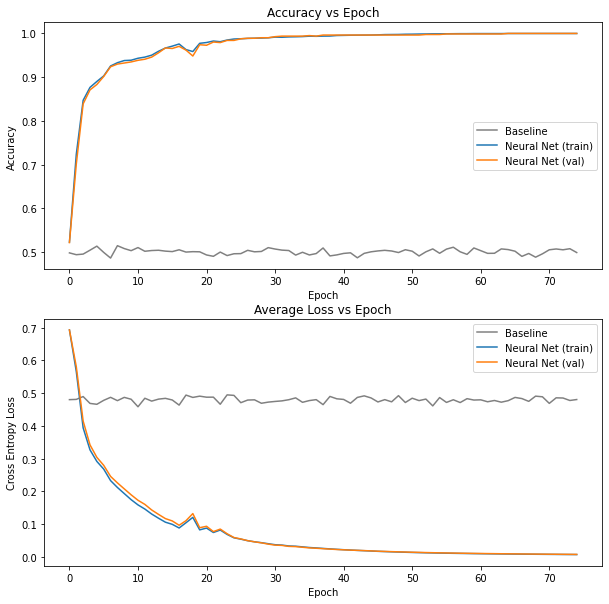

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def train_random(train_data, epochs=75):
    """
    Create a baseline by making a random guess every epoch.
    """
    loss = []
    accuracy = []
    
    for epoch in range(epochs):
        scores = np.random.rand(len(train_data[0]))
        predictions = np.round(scores)
        
        loss.append(CrossEntropy.forward(train_data[1], scores) / len(scores))
        accuracy.append(get_accuracy(train_data[1], predictions))
    
    return loss, accuracy

def graph(baseline_loss, baseline_accuracy, train_loss, train_accuracy, val_loss, val_accuracy):
    """
    Graph the neural net against the baseline.
    """
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

    # Plot accuracy
    axes[0].plot(baseline_accuracy, label="Baseline", color="gray")
    axes[0].plot(train_accuracy, label="Neural Net (train)")
    axes[0].plot(val_accuracy, label="Neural Net (val)")

    axes[0].set_title("Accuracy vs Epoch")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Accuracy")
    axes[0].legend()

    # Plot loss
    axes[1].plot(baseline_loss, label="Baseline", color="gray")
    axes[1].plot(train_loss, label="Neural Net (train)")
    axes[1].plot(val_loss, label="Neural Net (val)")

    axes[1].set_title("Average Loss vs Epoch")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Cross Entropy Loss")
    axes[1].legend()
    
graph(*train_random(train_data_sets[0]), *train_results)

# Conclusion

### Analyzing the graphs

As you can see from the above graphs, the neural net accuracy starts off fairly even with the random baseline. This makes sense because the neural net is initialized with random weights at each layer. Over time, the neural net improves, very rapidly at first as it goes through the SGD steps. The smoothness of the network accuracy improves over time as the learning rate becomes smaller and the network approaches the global minima for the loss. By the time we stop the training process, the neural net is capable of getting just a hair under 100% accuracy on all data sets, even the data that was set aside for validation and testing. This means that our network had enough capacity to learn all that was necessary for classification. Notice how the validation accuracy trails the training accuracy by a very small amount. This indicates that the network mostly avoids overfitting to the training data.

### Final thoughts

Now that the neural net components have been completed and worked successfully, it should be more clear how the various pieces fit together and what purpose they each serve. If one desired, they could create different versions of components like the loss function, activation functions, and optimizers. Neural nets can seem daunting and while there are many frameworks out there to make the creation of neural nets accessible without knowing the math or pieces behind the scenes, those frameworks can make an already confusing subject even more mystifying. Hopefully seeing a simpler framework implemented from scratch helps people understand the fundamentals behind neural nets and a glimpse of their power. Some datasets and problems are more prone to overfitting or learning issues and require more tweaking and network tricks, and sometimes a neural net just isn't the right tool for the job, but in this case we can safely say that if the neural net says the mushroom is poisonous, don't eat it!


---
# Submission Guidelines (keep this section here)
---


When you are ready to submit your project, part of the submission process will be to register your notebook for reviewing.  

You will also receive the links and instructions to do the peer reviews.

Please review the metadata:

In [ ]:
def get_metadata():
  meta = {
          "title": PROJECT_TITLE, # keep this as is
          "nb_id": NOTEBOOK_ID,   # keep this as is

          "data": ["https://drive.google.com/uc?export=view&id=1f6m9plNUFV_KnqHIX68Jw_RZslnra4rW"],

          # permissions
          # do you give the instructor the permission to copy this project
          # and allow others to view it in the class gallery?
          "allow_gallery": False,
          
          # if your project is made viewable to others,
          # do you want to include your name (first/last)?
          "allow_name_release": False
          }
  return meta

Specific instructions will come for what to submit for the various milestones.

If necessary, you can download the Python version of this notebook by using the `File->Download .py` as well as the notebook itself `File->Download .ipynb`.

